In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size']=20

plt.ion()

TODO; exponentielle réelle ; triangle, créneau, TDH avec k0=1, k0=4

Exo
----

Soit une charge nonlinéaire alimentée par une alimentation sinusoïdale. 
Le courant $i(t)$ qui traverse cette charge n'est pas sinusoïdal. 
On mesure et on échantillonne le courant $i[n]$, et on obtient un vecteur de longueur $N=64$.
Ce vecteur contient $4$ périodes entières du signal périodique $i[n]$ étudié.
L'information utile sera donc portée par $k_1=4$ ainsi que les harmoniques $mk_1$ où $m$ est un entier.
On donne en Fig. \ref{fig_sin_THD} le spectre de $I[k]$ et ci-dessous ses valeurs non nulles.
Calculer la THD (Total Harmonic Distorsion).

\begin{tabular}{ll}
1.& $I[4]= -26.2j, ~I[12]= -3.6j, ~I[20]=0.9j, ~I[28]= 0.8j$ \\
2.&  $I[4]= -28.5j, ~I[12]= -2.35j, ~I[20]=0.84j, ~I[28]= 0.23j$ 
\end{tabular}
\end{exercice}

\begin{figure}
\center
\includegraphics[width=0.7\linewidth]{fig/fig_sin_THD.png}
\caption{\label{fig_sin_THD} (haut) Signal $i[n]$; (milieu, bas) Spectre du signal $i[n]$.}
\end{figure}

[-1.66320862e-17 -7.01040876e-17 -9.51884377e-18 -7.65404249e-18
  7.65404249e-18  2.01015331e-17  2.48269288e-17  2.70404270e-17
  3.19401712e-17  2.70404270e-17  2.48269288e-17  2.01015331e-17
  7.65404249e-18 -7.65404249e-18 -9.51884377e-18 -7.01040876e-17]
[-0.00000000e+00 -4.09534257e-01 -2.69859641e-17 -5.76624337e-02
 -3.81639165e-17  1.48249397e-02 -2.69859641e-17  1.29531162e-02
 -0.00000000e+00 -1.29531162e-02  2.69859641e-17 -1.48249397e-02
  3.81639165e-17  5.76624337e-02  2.69859641e-17  4.09534257e-01]


'\nprint(np.imag(Vk[4]))\nprint(np.imag(Vk[12]))\nprint(np.imag(Vk[20]))\nprint(np.imag(Vk[28]))\n'

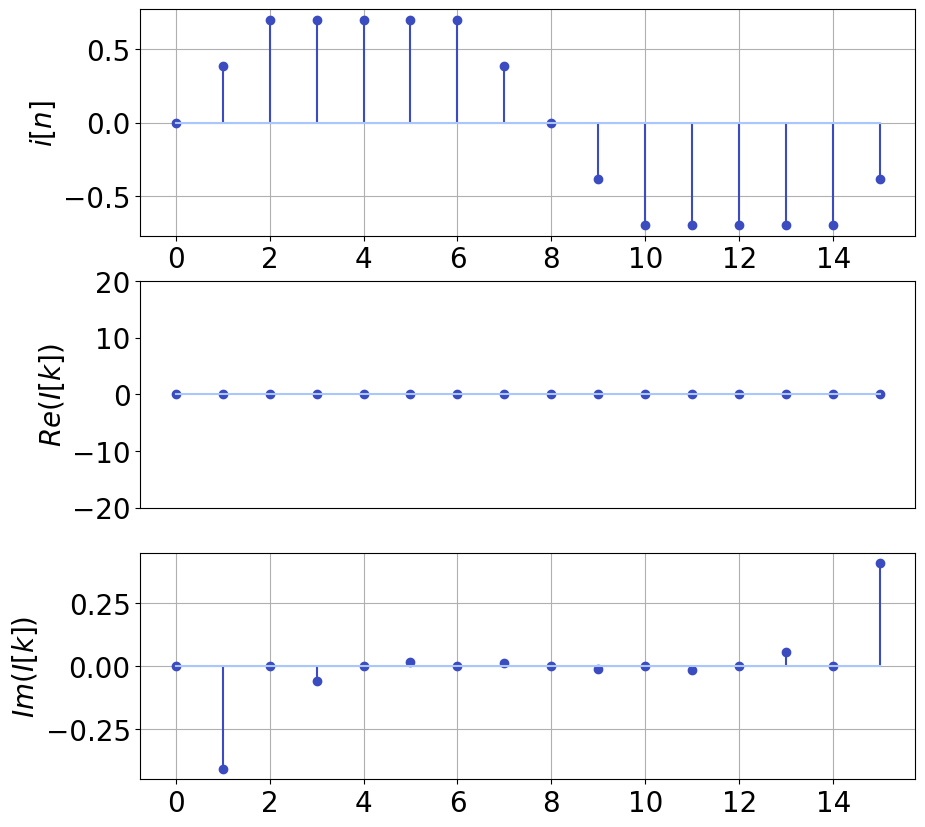

In [9]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION
# 
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

n=np.arange(16)
vn = np.sin(2*np.pi/16*n)
thr=0.7
idx_vn_pos = vn>thr
idx_vn_neg = vn<-thr
vn[idx_vn_pos]=thr
vn[idx_vn_neg]=-thr

Vk=fft(vn,norm='forward')

fig,ax = plt.subplots(3,1,figsize=(10,10))
ax[0].stem(vn)
ax[0].set_ylabel(r'$i[n]$')
ax[0].grid(True,which='both')
ax[1].stem(np.real(Vk))
ax[1].set_xticks([])
ax[1].set_ylabel(r'$Re(I[k])$')
ax[1].set_ylim([-20,20])
ax[2].stem(np.imag(Vk))
#ax[2].set_xticks([])
ax[2].set_ylabel(r'$Im(I[k])$')
ax[2].grid(True)

print(np.real(Vk))
print(np.imag(Vk))

"""
print(np.imag(Vk[4]))
print(np.imag(Vk[12]))
print(np.imag(Vk[20]))
print(np.imag(Vk[28]))
"""

In [14]:
TDH = 100 * np.sqrt(np.sum(np.abs(np.imag(Vk)[2:-2])**2)/( np.sqrt(2)*np.abs(np.imag(Vk)[1])))
print(TDH)

16.957257322447663


'\nprint(np.imag(Vk[4]))\nprint(np.imag(Vk[12]))\nprint(np.imag(Vk[20]))\nprint(np.imag(Vk[28]))      \n'

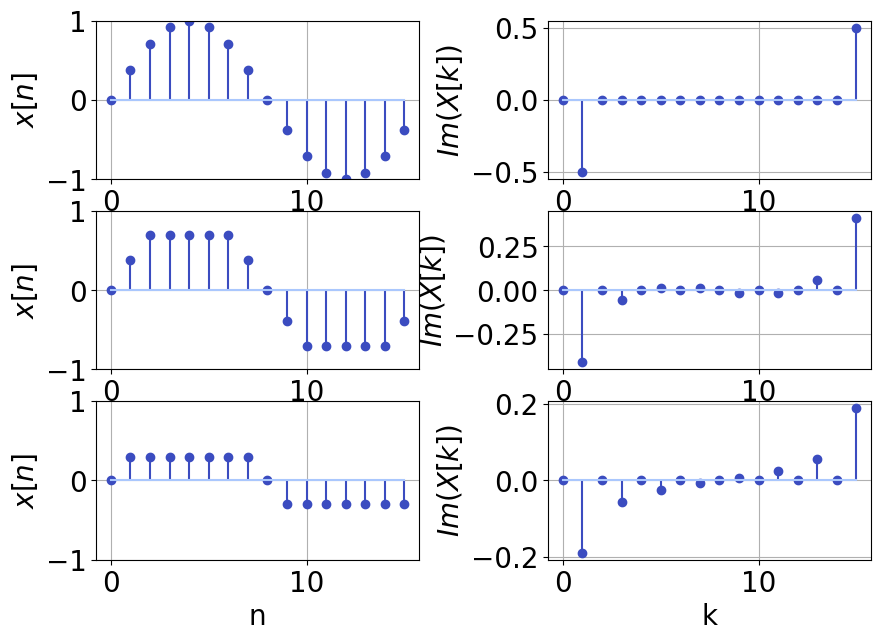

In [11]:
# SERIE FOURIER DISCRETE:
# TOTAL HARMONIC DISTORSION, WITH MORE & MORE DISTORSION
# 
# MATCHED FREQUENCY k=4
from scipy.fft import fft, ifft, fftfreq, fftshift

N=16
n=np.arange(N)
vn = np.sin(2*np.pi/16*n)

fig,ax = plt.subplots(3,2,figsize=(10,7))
thr_l=[1.0,0.7,0.3]
n_thr=len(thr_l)
for i,thr in enumerate(thr_l):
    # truncate
    #thr=0.7
    idx_vn_pos = vn>thr
    idx_vn_neg = vn<-thr
    vn[idx_vn_pos]=thr
    vn[idx_vn_neg]=-thr
    # fft
    Vk=fft(vn,norm='forward')
    # plot

    ax[i,0].stem(n[0:32],vn[0:32])
    ax[i,0].set_ylabel(r'$x[n]$')
    ax[i,0].grid(True,which='both')
    #ax[1].stem(np.real(Vk))
    #ax[1].set_xticks([])
    #ax[1].set_ylabel(r'$Re(I[k])$')
    ax[i,0].set_ylim([-1,1])
    ax[i,1].stem(n[0:32],np.imag(Vk[0:32]))
    if i==n_thr-1: 
        ax[i,0].set_xlabel("n")
        ax[i,1].set_xlabel("k")
    ax[i,1].set_ylabel(r'$Im(X[k])$')
    ax[i,1].grid(True)

plt.subplots_adjust(wspace=0.40)

#glue("fig_sin_THD_more_distorsion", fig, display=False)

"""
print(np.imag(Vk[4]))
print(np.imag(Vk[12]))
print(np.imag(Vk[20]))
print(np.imag(Vk[28]))      
"""